# **Facial Expressions Saturdays Ai**

Proyecto de la primera edición de Donostia de Saturdays Ai 2020.


1. Importación de librerías

In [23]:
import numpy as np 
import pandas as pd
import os
import cv2
from tqdm import tqdm
!pip install tensorflow
!pip install keras
!pip install --user --upgrade tensorflow-gpu
!pip install --user --upgrade tensorboard
!pip install keras==2.3.1
!pip install --user --upgrade tensorflow-gpu==1.14.0
from keras.utils import np_utils

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that dat

Using TensorFlow backend.


2. Importación data training

In [24]:
labels = []

for i in os.listdir('data/train/0'):
    labels.append(0)
for i in os.listdir('data/train/1'):
    labels.append(1)
for i in os.listdir('data/train/2'):
    labels.append(2)
for i in os.listdir('data/train/3'):
    labels.append(3)
for i in os.listdir('data/train/4'):
    labels.append(4)
for i in os.listdir('data/train/5'):
    labels.append(5)
for i in os.listdir('data/train/6'):
    labels.append(6)

In [25]:
#feature extraction on training data

loc1 = 'data/train/0'
loc2 = 'data/train/1'
loc3 = 'data/train/2'
loc4 = 'data/train/3'
loc5 = 'data/train/4'
loc6 = 'data/train/5'
loc7 = 'data/train/6'

features = []

for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 4965/4965 [00:03<00:00, 1616.43it/s]


In [26]:
labels_test = []
for i in os.listdir('data/test/0'):
    labels_test.append(0)
for i in os.listdir('data/test/1'):
    labels_test.append(1)
for i in os.listdir('data/test/2'):
    labels_test.append(2)
for i in os.listdir('data/test/3'):
    labels_test.append(3)
for i in os.listdir('data/test/4'):
    labels_test.append(4)
for i in os.listdir('data/test/5'):
    labels_test.append(5)
for i in os.listdir('data/test/6'):
    labels_test.append(6)

In [30]:
#feature extraction on testing data

loc1 = 'data/test/0'
loc2 = 'data/test/1'
loc3 = 'data/test/2'
loc4 = 'data/test/3'
loc5 = 'data/test/4'
loc6 = 'data/test/5'
loc7 = 'data/test/6'

test_features = []

for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))

100%|██████████| 626/626 [00:00<00:00, 1512.13it/s]


In [31]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [32]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [33]:
train_data.head()

,emotion,pixel_values
0,0,"[[201, 210, 215, 199, 188, 185, 172, 174, 174,..."
1,0,"[[255, 255, 255, 253, 251, 250, 247, 244, 244,..."
2,0,"[[243, 227, 192, 187, 196, 206, 209, 210, 205,..."
3,0,"[[36, 28, 30, 35, 29, 21, 18, 15, 27, 43, 79, ..."
4,0,"[[152, 156, 152, 153, 156, 133, 100, 98, 118, ..."


In [34]:
test_data.head()

,emotion,pixel_values
0,0,"[[245, 245, 239, 122, 144, 101, 33, 37, 84, 13..."
1,0,"[[134, 136, 137, 139, 140, 141, 143, 144, 144,..."
2,0,"[[210, 210, 210, 210, 210, 211, 214, 215, 214,..."
3,0,"[[213, 221, 227, 226, 223, 220, 213, 217, 223,..."
4,0,"[[76, 61, 39, 34, 35, 38, 43, 47, 52, 50, 49, ..."


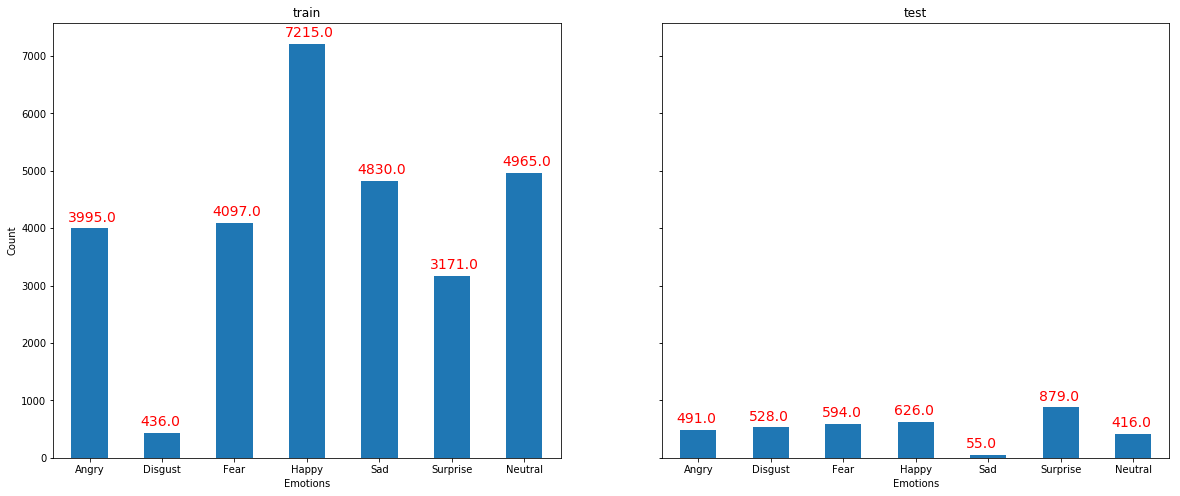

In [35]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
         axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='red',
                    rotation=0)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1,2, figsize=(20,8), sharey=True)
setup_axe(axes[0],train_data,'train')
setup_axe(axes[1],test_data,'test')
plt.show()

In [36]:
features = np.array(features).reshape(-1,48,48,1)
test_features = np.array(test_features).reshape(-1,48,48,1)

features = features/255
test_features = test_features/255

labels = np_utils.to_categorical(labels)
labels_test =np_utils.to_categorical(labels_test)

In [37]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

('Training features shape ', (28709, 48, 48, 1))
('Training labels shape', (28709, 7))
('Testing features shape ', (3589, 48, 48, 1))
('Testing labels shape', (3589, 7))


In [38]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score

In [39]:
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))
  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [41]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

In [42]:
history = model.fit(x=features, 
            y=labels,
            epochs=1, 
            batch_size = 20,
            verbose=1, 
            validation_data=(test_features,labels_test))


Train on 28709 samples, validate on 3589 samples
Epoch 1/1
28709/28709 [==============================] - 5336s 186ms/step - loss: 1.8631 - accuracy: 0.2391 - val_loss: 1.8101 - val_accuracy: 0.2530


In [43]:
modell = Sequential()
modell.add(Dense(10, input_dim=784, activation='relu'))
modell.add(Dense(10, activation='softmax'))
modell.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.fit(features, labels, epochs=10, validation_split=0.1)

Train on 25838 samples, validate on 2871 samples
Epoch 1/10
  160/25838 [..............................] - ETA: 3:22:08 - loss: 1.8454 - accuracy: 0.2937

KeyboardInterrupt: 

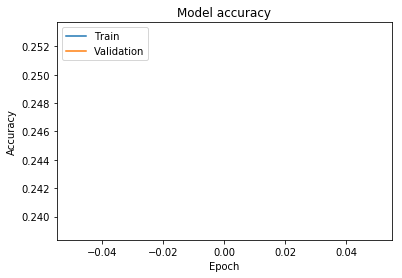

In [46]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))